# **실습 3 (선형대수 1)**
1. Install packages
2. Matrix operations
3. Linear system
4. Inverse matrix
5. Linear combination

선형대수 실습은, exercise 혹은 coding 문제풀이에 집중하기 보다는, 수업시간에 배웠던 개념들을 visualize 하면서 이를 폭넓게 이해하는 데에 초점을 맞추고 있습니다. 실습에서 사용한 예시 외에도, 다양한 matrix들을 visualize 하면서 개념을 익혀보시기 바랍니다.

# 1. Install packages

> 필요한 package를 설치하고 import합니다

In [1]:
!pip install matplotlib==3.1.0
# visualization을 위한 helper code입니다.
if 'google.colab' in str(get_ipython()):
    print('Downloading plot_helpers.py to util/ (only neded for colab')
    !mkdir util; wget https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py -P util

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.0-cp310-cp310-linux_x86_64.whl size=11750968 sha256=977d234051146f68810676ba5e20f8a03ec49f631f097fcc0592c86bed003cd3
  Stored in directory: /root/.cache/pip/wheels/fd/4d/10/e9efa74676a52fcc2f0a0247d72b9bdb09b4a5f5b4162c0173
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.0 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.

--2023-08-01 02:32:08--  https://raw.githubusercontent.com/minireference/noBSLAnotebooks/master/util/plot_helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8787 (8.6K) [text/plain]
Saving to: ‘util/plot_helpers.py’

plot_helpers.py     100%[===================>]   8.58K  --.-KB/s    in 0s      

2023-08-01 02:32:08 (65.7 MB/s) - ‘util/plot_helpers.py’ saved [8787/8787]



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
from util.plot_helpers import plot_vec, plot_vecs, autoscale_arrows

sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

## Numpy, matplotlib

> 선형대수 및 앞으로 공부할 과목들 (머신러닝, 딥러닝, 자연어처리)에서 끊임없이 사용하게 될 두 가지 package가 있는데, (1) Numpy, (2) Matplotlib 입니다. 본 실습은 선형대수 실습시간인 만큼, python package에 대해 자세히 설명하지는 않을 것입니다. 따라서 이에 대해 전혀 모르시는 경우, 다음 tutorial의 Numpy와 Matplotlib 부분을 먼저 따라 치면서 익히고 오시는 것을 추천합니다 (http://aikorea.org/cs231n/python-numpy-tutorial/).

> (주의 1) 해당 tutorial은 python 2 기준으로 작성되었기 때문에, google colab에서 오류가 날 수 있습니다 (e.g., print 다음 괄호가 없기 때문에 오류가 남). 그럴 경우엔 다음 링크 (https://cs231n.github.io/python-numpy-tutorial/#numpy)를 보고 수정하시면 됩니다 (같은 파일인데, 영어로 되어있습니다. 영어도 괜찮으시다면, 이 링크를 바로 보시는게 편합니다).

> (주의 2) Matplotlib의 맨 마지막 예시 (imshow 사용)는 건너뛰시면 됩니다.

# 2. Matrix operations

matrix의 기본 성질에 대해 복습해봅시다.

> Matrix addition $\cdot$ matrix multiplication은 Matrix $A,B,C$, 그리고 constant $c$에 대해 다음 식들을 만족합니다.

> Addition
1.   $A+ B= B+ A$
2.   $(A+B)+ C=A+(B+C)$
3.   $c(A+B)=cA+cB$
4.   $(c+d)A=cA+c{D}$
5.   $c(dA)=(cd)A$
6.   $A+{0}=A$, where ${0}$ is the zero matrix
7.   For any $A$, there exists an $- A$, such that $ A+(- A)=0$.

> Multiplication
1.   $ A({BC})=({AB}) C$
2.   $c({AB})=(cA)B=A(cB)$
3.   $A(B+ C)={AB}+{AC}$
4.   $(B+C)A={BA}+{CA}$

> Multiplication의 경우 (1) elementwise multiplication과 (2) matrix multiplication이 있는데, 양쪽 다 많이 쓰이는 만큼 잘 구분해야 합니다.


In [14]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [15]:
A*B # elementwise product

array([[ 5, 12],
       [21, 32]])

In [16]:
A@B # matrix product

array([[19, 22],
       [43, 50]])

> Matrix multiplication은 교환법칙이 성립하지 않습니다 ($AB \neq BA$). 아래 sympy는 $x_1$, $x_2$ 등의 기호(symbol)을 사용하게 해주는 라이브러리입니다.

In [17]:
import sympy as sy

A = sy.Matrix([[3, 4], [7, 8]])
B = sy.Matrix([[5, 3], [2, 1]])

A@B

⎡23  13⎤
⎢      ⎥
⎣51  29⎦

In [18]:
B@A

⎡36  44⎤
⎢      ⎥
⎣13  16⎦

> 하지만 vector multiplication은 교환법칙이 성립합니다 ($x^Ty = y^Tx$).

In [19]:
# 계산에 사용할 기호(symbol)들을 아래와 같이 선언합니다.
x1, x2, y1, y2 = sy.symbols('x1, x2, y1, y2', real = True)

# 위에서 선언한 기호를 활용하여, np.array와 유사한 방식으로 벡터를 선업합니다.
x = sy.Matrix([x1, x2])
y = sy.Matrix([y1, y2])

x.T@y

[x₁⋅y₁ + x₂⋅y₂]

In [20]:
y.T@x

[x₁⋅y₁ + x₂⋅y₂]

> Matrix transpose는 Matrix $A,B$, 그리고 constant $c$에 대해 다음 식들을 만족합니다.

1. $(A^T)^T$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

4번이 성립하는지 실제로 알아봅시다.


In [21]:
a, b, c, d, e, f, g, h, i, j, k, l = sy.symbols('a, b, c, d, e, f, g, h, i, j, k, l', real = True)

A = sy.Matrix([[a, b], [c, d], [e, f]])
B = sy.Matrix([[g, h, i], [j, k, l]])
AB = A@B
AB_tr = AB.transpose()
AB_tr  # 4번의 좌항

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

In [22]:
B_tr_A_tr = B.transpose()@A.transpose()
B_tr_A_tr  # 4번의 우항

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

In [23]:
AB_tr == B_tr_A_tr

True

> 따라서 $(AB)^T$ 는 $B^TA^T$와 같음을 알 수 있습니다.

# 3. Linear system


> Linear system은 n(>=1)개의 linear equation(일차 방정식)들의 collection을 뜻합니다. 동일한 n개의 variable을 가진 m개의 일차 방정식들은, 다음과 같이 표현될 수 있습니다



$$ a_{11}x_{1}+a_{12}x_{2}+a_{13}x_{3}+\cdots +a_{1n}x_{n}=b_{1} \\
a_{21}x_{1}+a_{22}x_{2}+a_{13}x_{3}+\cdots +a_{2n}x_{n}=b_{2} \\
\cdots \\
a_{m1}x_{1}+a_{m2}x_{2}+a_{m3}x_{3}+\cdots +a_{mn}x_{n}=b_{m}
$$

### n=2일 때의 linear system
> 다음과 같은 예시를 생각해 봅시다.



$$ x_1 + x_2 = 6 \\
x_1 - x_2 = -4 $$.

> 두 linear equation을 plot한다면

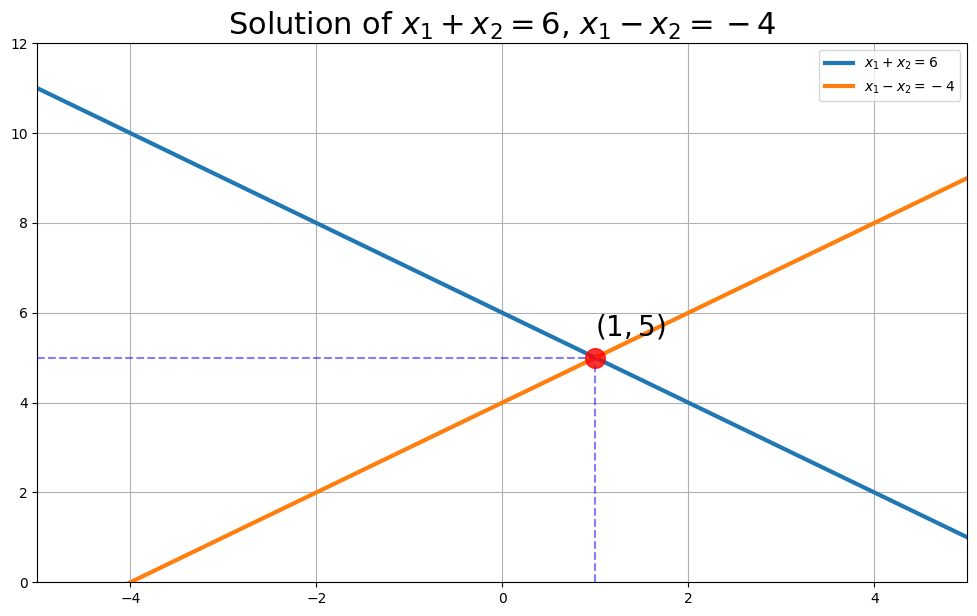

In [24]:
x1 = np.linspace(-5, 5, 100)
x2_1 = -x1 + 6
x2_2 = x1 + 4

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(1, 5, s = 200, zorder=5, color = 'r', alpha = .8)

ax.plot(x1, x2_1, lw =3, label = '$x_1+x_2=6$')
ax.plot(x1, x2_2, lw =3, label = '$x_1-x_2=-4$')
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 12])

ax.legend()
s = '$(1,5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x_1+x_2=6$, $x_1-x_2=-4$', size = 22)
ax.grid()

> 이 나오게 됩니다. 따라서 두 직선이 만나는 교점, 즉 $x_1=1, x_2=5$가 주어진 두 linear equation을 만족하는 해가 됨을 알 수 있습니다. 이는 굳이 plot을 그리지 않고도, 연립방정식을 사용하여 쉽게 구할 수 있습니다.




### n=3일 때의 linear system
> 다음과 같은 예시를 생각해 봅시다.



$$ x_1 + 2x_2 + 3x_3 = 6 \\
2x_1 + 5x_2 + 2x_3 = 4 \\
6x_1 - 3x_2 + x_3 = 2 $$.

> 세 linear equation을 plot한다면

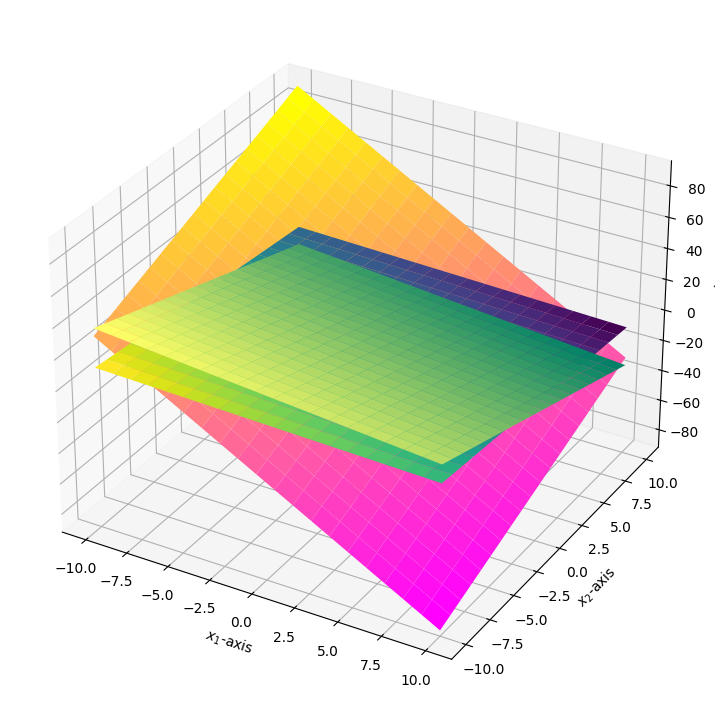

In [25]:
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3_1 = (6 - 2*X2 - X1) * (1/3)
ax.plot_surface(X1, X2, X3_1, cmap ='viridis', alpha = 1)

X3_2 = (4 - 5*X2 - 2*X1) * (1/2)
ax.plot_surface(X1, X2, X3_2, cmap ='summer', alpha = 1)

X3_3 = 2  + 3*X2 - 6*X1
ax.plot_surface(X1, X2, X3_3, cmap ='spring', alpha = 1)

ax.set_xlabel('$x_1$-axis')
ax.set_ylabel('$x_2$-axis')
ax.set_zlabel('$x_3$-axis')

plt.show()



> 이 나오게 됩니다. 따라서 n=2인 첫 번째 예시와 마찬가지로, 세 평면이 만나는 교점을 찾으면 주어진 세 linear equation을 만족하는 해가 됩니다. n=2일 경우보다 그림을 보고 직관적으로 해를 알기 어렵고, 연립방정식으로 해를 구하는 것도 상대적으로 복잡해졌음을 알 수 있습니다.

> 주어진 예시들은

$$ Ax = b $$
$$ \begin{bmatrix}
1 & 2 & 3\\
2 & 5 & 2\\
6 & -3 & 1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
6\\
4\\
2
\end{bmatrix} $$

> 의 꼴로 생각할 수 있는데, 위의 두 plot은 이를 "row" (linear equation)를 중심으로 이들의 교점을 구하는 방식으로 접근했습니다. 이 방식과는 다르게, "column"들을 중심으로 생각해봅시다. 각 column을 vector로 생각하면 위 linear system은

$$ x_1\begin{bmatrix}
1\\
2\\
6
\end{bmatrix} + x_2\begin{bmatrix}
2\\
5\\
-3
\end{bmatrix} + x_3\begin{bmatrix}
3\\
2\\
1
\end{bmatrix} =  \begin{bmatrix}
6\\
4\\
2
\end{bmatrix}$$

> 로 분해할 수 있습니다 (Matrix multiplications as column combinations). 즉 이 경우 $x_1, x_2, x_3$은 각 column vector의 계수가 됩니다. 이를 plot한다면

column vectors: Matrix([[1], [2], [6]]) Matrix([[2], [5], [-3]]) Matrix([[3], [2], [1]])


TypeError: ignored

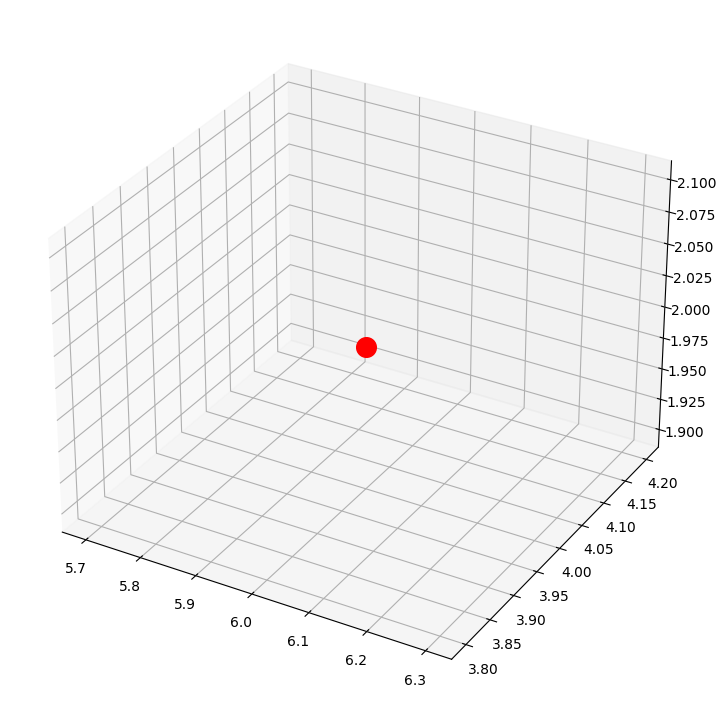

In [40]:
A = sy.Matrix([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

print('column vectors:', A.col(0), A.col(1), A.col(2))

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(6, 4, 2, s = 200, color = 'red')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

> 위와 같이 나오게 됩니다. 즉, 세 column vector ([1,2,6], [3,2,1],[2,5,-3])를 linear combination 해서 b ([6,4,2]) 를 만드는 계수 $x_1,x_2,x_3$을 찾는 문제로 바뀌게 됩니다.

*   Row picture: 각 row (linear equation; $a_{i1}x_{1}+a_{i2}x_{2}+a_{i3}x_{3}+\cdots +a_{in}x_{n}=b_{i}$) 들의 교점을 찾는다.
*   Column picture: 각 column (vector; $[a_{1i}, a_{2i}, \cdots, a_{mi}]^T$) 들의 linear combination이 b가 되도록 하는 계수 $x_1, x_2, x_3$을 찾는다.

> 오늘 강의에서 $Ax=b$의 해를 찾는 방법을 자세히 배우지는 않았지만, 위 예시의 경우 우연히도 2*[3,2,1] = [6,4,2]이기 때문에, 해가 $[x_1, x_2, x_3] = [0,0,2]$임을 쉽게 알 수 있습니다. sympy를 사용해서 위 $x$가 해가 맞는지 확인해봅시다.



In [27]:
from sympy.solvers.solveset import linsolve  # linsolve 함수로 해를 구할 것입니다

x1, x2, x3 = sy.symbols('x1 x2 x3')
A = sy.Matrix(((1,2,3),(2,5,2),(6,-3,1)))
b = sy.Matrix((6,4,2))

system = A,b  # 이와 같이 system을 정의합니다.
linsolve(system, x1, x2, x3)  # system, 그리고 x의 원소를 차례로 넣습니다.

{(0, 0, 2)}

>$x$의 해가 [0,0,2]가 맞음을 sympy로도 확인할 수 있습니다.이처럼, 앞으로 배우게 될 강의에서도 주로 column picture의 관점에서 문제들을 생각하게 될 것입니다.


### 해가 없는 경우의 linear system
> 위의 두 예시는 해가 1개만 존재하는 linear system 이었습니다. $A$의 inverse가 존재하기 때문에, 해 $x$는 unique하게 한 개만 존재하는 경우입니다. 이젠 다음과 같은 예시를 생각해 봅시다.

$$ x_1 + x_2 + x_3 = 1 \\
x_1 - x_2 - 2x_3 = 2 \\
2x_1 - x_3 = 1 $$.

> 위 system을 행렬로 표현해보면

$$ Ax = b $$
$$ \begin{bmatrix}
1 & 1 & 1\\
1 & -1 & -2\\
2 & 0 & -1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
1\\
2\\
1
\end{bmatrix} $$

> 이 됩니다. 이를 column picture로 plot해 본다면

TypeError: ignored

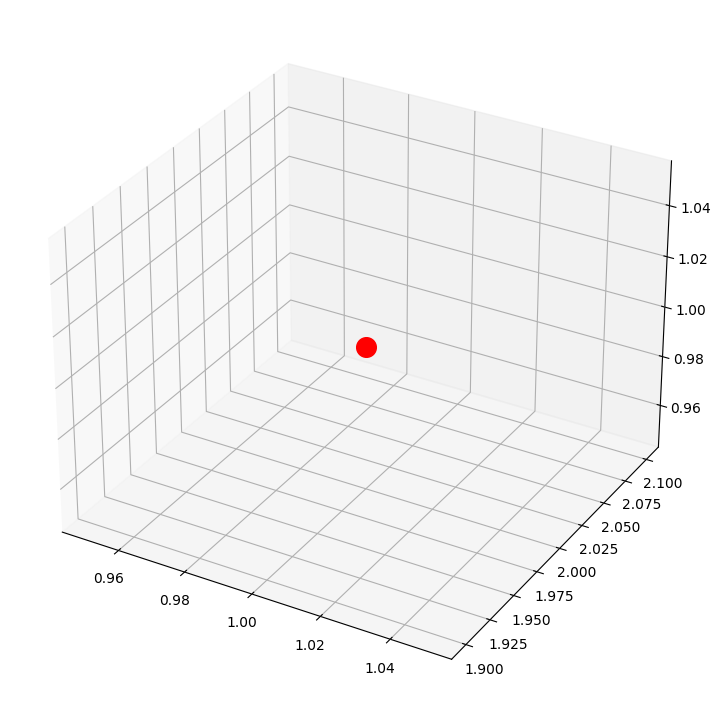

In [28]:
A = sy.Matrix([[1, 1, 1], [1, -1, -2], [2, 0, -1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(1, 2, 1, s = 200, color = 'red')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

> 세 column vector의 linear combination으로 b (빨간색 점) 를 만들 수 있으면 해가 1개 이상 존재하고, 만드는 것이 불가능 하다면 해가 존재하지 않습니다. A의 해를 확인해 봅시다.

In [29]:
x1, x2, x3 = sy.symbols('x1 x2 x3')
A = sy.Matrix(((1,1,1),(1,-1,-2),(2,0,-1)))
b = sy.Matrix((1,2,1))

system = A,b
linsolve(system, x1, x2, x3)

∅

> 해가 없음을 알 수 있습니다. 만약 $A$가 invertible 하다면 (즉 A의 determinant가 0이 아니라면), 해 $x$는 반드시 존재하며, 1개로 unique하게 얻어져야 합니다. 따라서, 이 경우엔 해가 없기 때문에, *det A* 가 0이 되는지 확인해봅시다.

In [30]:
A.det()

0

### 해가 무수히 많은 경우의 linear system
> 다음과 같은 예시를 생각해 봅시다.

$$ x_2 - x_3 = 4 \\
2x_1 + x_2 + 2x_3 = 4 \\
2x_1 + 2x_2 + x_3 = 8 $$.

> 위 system을 행렬로 표현해보면

$$ Ax = b $$
$$ \begin{bmatrix}
0 & 1 & -1\\
2 & 1 & 2\\
2 & 2 & 1
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
4\\
4\\
8
\end{bmatrix} $$

> 이 됩니다. 이를 column picture로 plot해 본다면

TypeError: ignored

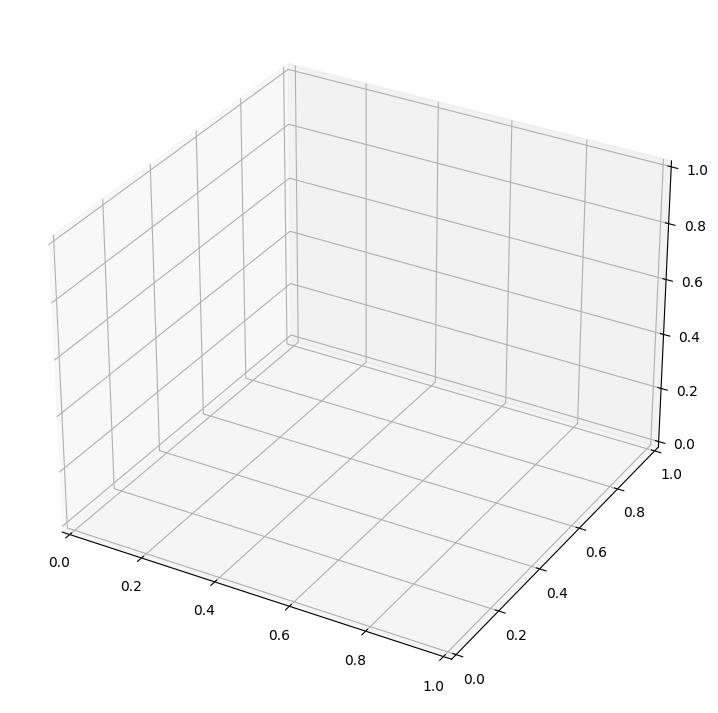

In [31]:
A = sy.Matrix([[0, 1, -1], [2, 1, 2], [2, 2, 1]])
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([x1,x2,x3])

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')

plot_vecs(A.col(0), A.col(1), A.col(2))
autoscale_arrows()

ax.scatter(4,4,8, s = 200, color = 'red')
ax.set(xlim = [0.,5.], ylim = [0.,5.,], zlim = [0., 10.])

plt.show()

> 이 됩니다. 세 column vector의 linear combination으로 b (빨간색 점) 를 만들 수 있으면 해가 1개 이상 존재하고, 만드는 것이 불가능 하다면 해가 존재하지 않습니다. A의 해를 확인해봅시다.

In [ ]:
A = sy.Matrix(((0,1,-1),(2,1,2),(2,2,1)))
b = sy.Matrix((4,4,8))
system = A,b
linsolve(system, x1, x2, x3)

> 위 결과가 의미하는 것은, 어떤 $x_3$의 값에 대해서도 위와 같은 형태의 vector는 해가 된다는 것입니다. 즉 ..., (-3/2, 5, 1) ($x_3$이 1일 경우), (-3, 6, 2) ($x_3$이 2일 경우), ..., (-3n/2, n+4, n), ... 모두가 해가 될 수 있다는 것이므로, 해가 무수히 많이 존재하는 경우입니다. 이때도 마찬가지로 해 $x$가 unique하게 결정되지 않는 case이므로, A의 determinant가 0인지 확인해봅시다.

In [32]:
A.det()

0

### Exercise

다음 linear system들의 (i) 해가 무수히 많이 존재하는 경우, (ii) 해가 한 개 존재하는 경우, (iii) 해가 존재하지 않는 경우로 나누고 존재할 경우 해를 구하시오. 또한 각각에 대해 A의 inverse가 존재하는지 설명하시오. (Hint: 위 예시의 linsolve 함수를 사용)


$ Ax = b $ \\
(a) $ \begin{bmatrix}
0 & 1 & 4\\
1 & 3 & 5\\
3 & 7 & 7
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
-5\\
-2\\
6
\end{bmatrix} $ \\
(b) $ \begin{bmatrix}
1 & 0 & -3\\
2 & 2 & 9\\
0 & 1 & 5
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
8\\
7\\
-2
\end{bmatrix} $ \\
(c) $ \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 9\\
9 & 12 & 21
\end{bmatrix} \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix} = \begin{bmatrix}
5\\
2\\
9
\end{bmatrix} $



Answer:

In [33]:
# answer: 해가 존재하지 않음
A = sy.Matrix([[0,1,4],[1,3,5],[3,7,7]])
b = sy.Matrix([-5,-2,6])
system = A,b
linsolve(system, x1, x2, x3)

∅

In [34]:
# answer: 해가 unique하게 한개만 존재
A = sy.Matrix([[1,0,-3],[2,2,9],[0,1,5]])
b = sy.Matrix([8,7,-2])
system = A,b
linsolve(system, x1, x2, x3)

{(5, 3, -1)}

In [35]:
# answer: 해가 무수히 많이 존재
A = sy.Matrix([[1,2,3],[4,5,9],[9,12,21]])
b = sy.Matrix([5,2,9])
system = A,b
linsolve(system, x1, x2, x3)

{(-x₃ - 7, 6 - x₃, x₃)}

# 4. Inverse matrix

> Square matrix $A$의 역행렬 $A^{-1}$은 다음과 같이 정의됩니다.

$$ A^{-1}A = AA^{-1} = I_n$$

> 역행렬이 존재한다는 의미는, input vector $x$와 output vector $Ax$ 사이에 일대일대응 관계가 성립한다는 의미입니다.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Bijection.svg/225px-Bijection.svg.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>


> 즉, $Ax$로부터 $x$를 복원할 수 있다는 말이고, 이를 복원하는 행렬이 $A^{-1}$이 됩니다.

> 만약 $n \times n$ 행렬 $A$의 역행렬이 존재한다면, $Ax = b$는 $x = A^{-1}b$로 해를 구할 수 있습니다.

In [36]:
A = np.array([[1, 2, 3], [2, 5, 2], [6, -3, 1]])
b = np.array([6,4,2])

A_inv = np.linalg.inv(A)  # np.linalg.inv를 활용하면 A의 inverse를 구할 수 있습니다
A_inv_b = A_inv @ b  # A^{-1}b
x = A_inv_b  # x = A^{-1}b
print(x)

# 검산해봅시다 (구한 x를 대입)
print(A@x)
print(b)

[0. 0. 2.]
[6. 4. 2.]
[6 4 2]


> Ax와 b가 같음을 알 수 있습니다.

# 5. Linear combination

두 vector $ \begin{bmatrix} 4 \\ 2 \end{bmatrix}   $, $ \begin{bmatrix} -2 \\ 2 \end{bmatrix} $의 linear combination은 다음과 같이 나타낼 수 있습니다.

$$ c_1\begin{bmatrix} 4 \\ 2 \end{bmatrix} + c_2\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

이를 plot해 봅시다.

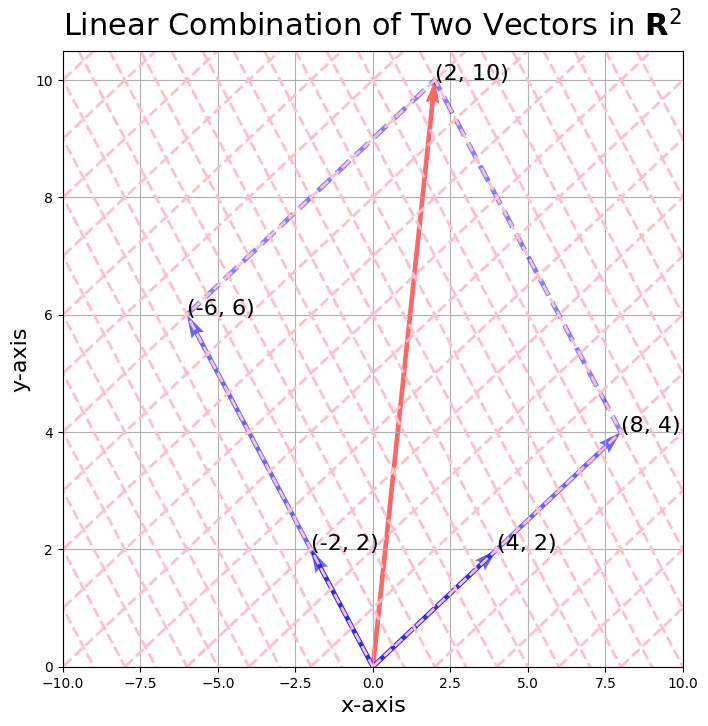

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]],
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

# tail이 origin, head가 (4,2), (-2,2), (2,10), (8,4), (-6,6)인 vector plot
for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

# tail이 (8,4), head가 (2,10)인 vector plot
points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

# tail이 (-6,6), head가 (2,10)인 vector plot
points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

# 붉은색 격자 plot
for i in a:
    y1 = i + 0.5*x  # 0.5(기울기) = 2/4
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x  # -1(기울기) = 2/(-2)
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)

ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

> 위의 그림은 두 벡터의 linear combination으로 $ \begin{bmatrix} 2 \\ 10 \end{bmatrix}$을 만드는 그립입니다.

$$ \begin{bmatrix} 2 \\ 10 \end{bmatrix} =  2\begin{bmatrix} 4 \\ 2 \end{bmatrix} + 3\begin{bmatrix} -2 \\ 2 \end{bmatrix} $$

> $\begin{bmatrix} 4 \\ 2 \end{bmatrix}$에 3을 곱하고, $\begin{bmatrix} -2 \\ 2 \end{bmatrix}$에 2를 곱한 뒤 더하면 $\begin{bmatrix} 2 \\ 10 \end{bmatrix}$이 나옴을 알 수 있습니다. 붉은 격자는 두 벡터의 linear combination으로 도달할 수 있는 공간을 의미합니다. 그림에서 해당 붉은 격자가 $R^2$ 전체를 커버함을 확인할 수 있습니다.

# Reference

1. https://en.wikipedia.org/wiki/Bijection,_injection_and_surjection
2. http://aikorea.org/cs231n/python-numpy-tutorial/#matplotlib
3. https://github.com/MacroAnalyst/Linear_Algebra_With_Python